# 와인 품질 분류

wine_quality.csv 파일이 존재합니다.

와인의 여러가지 화학 성분을 기반으로 와인의 품질을 분류해내는 것이 목표입니다.

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

데이터셋 출처: https://dacon.io/competitions/open/235610/data

(학습을 위해 원래 데이터셋에서 test.csv는 제외하고, train.csv 파일만을 고려하여 진행했습니다.)

In [1]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#데이터셋 불러오기

In [2]:
wine_data=pd.read_csv("./train.csv",encoding='latin-1')
wine_data.head(5)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


## 데이터 전처리, EDA 및 시각화

### wine_data 데이터를 살펴보고, 쓸모 없는 column을 삭제하시오.(index column 삭제)

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
wine_data.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00
mean,2748.00,5.82,7.21,0.34,0.32,5.44,0.06,30.42,115.57,0.99,3.22,0.53,10.50
std,1586.99,0.87,1.29,0.16,0.15,4.76,0.03,17.67,56.29,0.00,0.16,0.15,1.19
min,0.00,3.00,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.74,0.22,8.00
25%,1374.00,5.00,6.40,0.23,0.25,1.80,0.04,17.00,78.00,0.99,3.11,0.43,9.50
50%,2748.00,6.00,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30
75%,4122.00,6.00,7.70,0.40,0.39,8.10,0.06,41.00,155.00,1.00,3.32,0.60,11.30
max,5496.00,9.00,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90


In [3]:
wine_data.drop(['index'], axis="columns", inplace=True)

In [6]:
#wine_data.columns 결과 확인

In [7]:
wine_data.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

### info()를 결측치가 있는지 확인하고, describe()를 통해 수치형 피쳐들의 scale을 살펴보고, 스케일링을 진행해야 하는지 살펴보시오. 

In [8]:
wine_data.info()   ##결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [9]:
wine_data.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00,5497.00
mean,5.82,7.21,0.34,0.32,5.44,0.06,30.42,115.57,0.99,3.22,0.53,10.50
std,0.87,1.29,0.16,0.15,4.76,0.03,17.67,56.29,0.00,0.16,0.15,1.19
min,3.00,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.74,0.22,8.00
25%,5.00,6.40,0.23,0.25,1.80,0.04,17.00,78.00,0.99,3.11,0.43,9.50
50%,6.00,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30
75%,6.00,7.70,0.40,0.39,8.10,0.06,41.00,155.00,1.00,3.32,0.60,11.30
max,9.00,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90


### wine_data에서 각 피쳐들 간의 상관관계를 나타내는 히트맵을 출력하시오.

In [10]:
wine_data.corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.00,-0.08,-0.26,0.08,-0.03,-0.20,0.06,-0.04,-0.30,0.02,0.04,0.44
fixed acidity,-0.08,1.00,0.21,0.33,-0.11,0.30,-0.28,-0.32,0.45,-0.25,0.30,-0.10
volatile acidity,-0.26,0.21,1.00,-0.38,-0.19,0.39,-0.35,-0.42,0.27,0.26,0.23,-0.03
citric acid,0.08,0.33,-0.38,1.00,0.14,0.03,0.13,0.19,0.09,-0.32,0.05,-0.01
residual sugar,-0.03,-0.11,-0.19,0.14,1.00,-0.13,0.40,0.49,0.56,-0.26,-0.18,-0.36
chlorides,-0.20,0.30,0.39,0.03,-0.13,1.00,-0.19,-0.28,0.36,0.05,0.40,-0.26
free sulfur dioxide,0.06,-0.28,-0.35,0.13,0.40,-0.19,1.00,0.72,0.03,-0.15,-0.19,-0.18
total sulfur dioxide,-0.04,-0.32,-0.42,0.19,0.49,-0.28,0.72,1.00,0.04,-0.23,-0.27,-0.27
density,-0.30,0.45,0.27,0.09,0.56,0.36,0.03,0.04,1.00,0.02,0.26,-0.69
pH,0.02,-0.25,0.26,-0.32,-0.26,0.05,-0.15,-0.23,0.02,1.00,0.19,0.11


<AxesSubplot:>

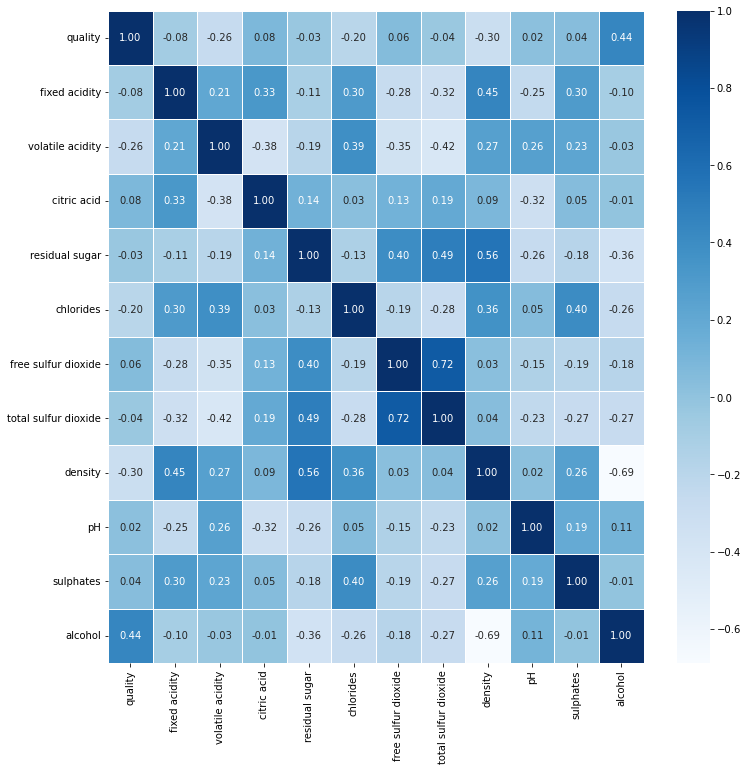

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data = wine_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')


### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_wine, y_wine으로 저장하시오. (target은 quality)

In [4]:
X_wine= wine_data.drop('quality', axis = 1)
y_wine= wine_data['quality']

In [13]:
#데이터 확인(X_wine)

In [14]:
X_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.60,0.69,0.06,6.80,0.04,9.00,84.00,0.99,3.44,0.44,10.20,white
1,8.80,0.61,0.14,2.40,0.07,10.00,42.00,1.00,3.19,0.59,9.50,red
2,7.90,0.21,0.39,2.00,0.06,21.00,138.00,0.99,3.05,0.52,10.90,white
3,7.00,0.21,0.31,6.00,0.05,29.00,108.00,0.99,3.26,0.50,10.80,white
4,7.80,0.40,0.26,9.50,0.06,32.00,178.00,1.00,3.04,0.43,10.90,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.70,0.15,0.29,1.30,0.03,10.00,64.00,0.99,3.35,0.39,10.10,white
5493,6.30,0.18,0.36,1.20,0.03,26.00,111.00,0.99,3.16,0.51,11.00,white
5494,7.80,0.15,0.34,1.10,0.04,31.00,93.00,0.99,3.07,0.72,11.30,white
5495,6.60,0.41,0.31,1.60,0.04,18.00,101.00,0.99,3.13,0.41,10.50,white


In [15]:
#데이터 확인(y_wine)

In [16]:
y_wine

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

### 피쳐값 중 카테고리 변수가 1가지 있다. 이에 대해 Encoding을 진행하시오.

In [5]:
wine_data['type'] = wine_data.type.astype("category").cat.codes
wine_data.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [18]:
#Encoding이 잘 되었는지 확인

In [19]:
wine_data['type'].unique()

array([1, 0], dtype=int8)

### 피쳐값에 대해 MinMaxScaler()를 이용해 스케일링을 하시오.
- 스케일링 된 피쳐값은 데이터프레임 형식으로 X_wine_scaled에 저장

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_wine= wine_data.drop('quality', axis = 1)
y_wine= wine_data['quality']

scaler=MinMaxScaler()
X_wine_scaled=scaler.fit_transform(X_wine)

In [38]:
#Scaling 잘 되었는지 확인

In [39]:
X_wine_scaled

array([[0.14876033, 0.41      , 0.03614458, ..., 0.12359551, 0.31884058,
        1.        ],
       [0.41322314, 0.35333333, 0.08433735, ..., 0.20786517, 0.2173913 ,
        0.        ],
       [0.33884298, 0.08666667, 0.23493976, ..., 0.16853933, 0.42028986,
        1.        ],
       ...,
       [0.33057851, 0.04666667, 0.20481928, ..., 0.28089888, 0.47826087,
        1.        ],
       [0.23140496, 0.22      , 0.18674699, ..., 0.10674157, 0.36231884,
        1.        ],
       [0.26446281, 0.18      , 0.10240964, ..., 0.07865169, 0.24637681,
        1.        ]])

### train_test_split()을 이용해 train set와 test set를 분리하시오.
- testset 의 size : 전체 데이터 셋의 20%
- 각 set의 이름 : X_train, X_test, y_train, y_test
- random_state = 123

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X_wine_scaled,y_wine, test_size=0.2, random_state=123)

In [41]:
#잘 분리되었는지 확인

In [42]:
print('학습셋의 shape: ', X_train.shape)
print('검증셋의 shape: ', X_test.shape)
print('학습셋 label의 shape: ', y_train.shape)
print('검증셋 label의 shape: ', y_test.shape)

학습셋의 shape:  (4397, 12)
검증셋의 shape:  (1100, 12)
학습셋 label의 shape:  (4397,)
검증셋 label의 shape:  (1100,)


### GradientBoostingClassifier을 사용해 train data를 fit 한 후, test data로 예측을 수행하고 정확도를 구하시오

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

gb_pred = gb_clf.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, gb_pred))


Accuracy Score : 0.5418181818181819


### GridSearchCV를 사용해 최적 하이퍼 파라미터 조합을 찾으시오
params={
    'learning_rate':[0.05,0.1],
    'n_estimators':[100,500]
}

In [43]:
from sklearn.model_selection import GridSearchCV

params={ 'learning_rate':[0.05,0.1], 'n_estimators':[100,500] }

grid_cv = GridSearchCV(gb_clf, param_grid = params) 
grid_cv.fit(X_train, y_train)

C:\Users\82106\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [100, 500]})

In [44]:
grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

최적으로 학습된 estimator로 예측을 수행하시오

In [45]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.5655


## XGBoost 및 LightGBM 실습

### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도 및 F1 스코어를 출력하시오.
- n_estimators=400
- learning_rate = 0.1
- max_depth = 3

In [31]:
#accuracy_score(), f1_score 임포트
#f1_score는 기본적으로 이진분류에 사용되므로, 다중분류에서 사용하고 싶으면 average='무엇무엇' 설정해주면 됨
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 공식 문서 참고

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test , pred)
    f1 = f1_score(y_test,pred,average=None)
    print(accuracy, f1)
    
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , w_preds, w_pred_proba)



C:\Users\82106\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:42:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5854545454545454 [0.         0.0952381  0.61087866 0.61538462 0.51873199 0.54166667
 0.        ]


### 사이킷런 래퍼 클래스 LightGBM와 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합과 그 하이퍼 파라미터의 예측 정확도를 구하시오.
- 'n_estimators' : [100,200,300,400,500]
- 'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2]
- 'max_depth' : [3,4,5,6,7]

(제 컴퓨터에선 2분정도 걸려욤)

In [42]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [100,200,300,400,500],
'learning_rate' : [0.01,0.05, 0.1, 0.15, 0.2],
'max_depth' : [3,4,5,6,7]}
clf=GridSearchCV(lgbm_wrapper,parameters,scoring='accuracy')


clf.fit(X_train, y_train) 
print(clf.best_params_) 
predicted=clf.predict(X_test) 
print('Classification of the result is:') 
print(accuracy_score(y_test, predicted))


C:\Users\82106\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\82106\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.24616
[2]	valid_0's multi_logloss: 1.19818
[3]	valid_0's multi_logloss: 1.1667
[4]	valid_0's multi_logloss: 1.13969
[5]	valid_0's multi_logloss: 1.11497
[6]	valid_0's multi_logloss: 1.09716
[7]	valid_0's multi_logloss: 1.07999
[8]	valid_0's multi_logloss: 1.06517
[9]	valid_0's multi_logloss: 1.05251
[10]	valid_0's multi_logloss: 1.0419
[11]	valid_0's multi_logloss: 1.03067
[12]	valid_0's multi_logloss: 1.02156
[13]	valid_0's multi_logloss: 1.01638
[14]	valid_0's multi_logloss: 1.01066
[15]	valid_0's multi_logloss: 1.00558
[16]	valid_0's multi_logloss: 0.998802
[17]	valid_0's multi_logloss: 0.99297
[18]	valid_0's multi_logloss: 0.988486
[19]	valid_0's multi_logloss: 0.983221
[20]	valid_0's multi_logloss: 0.978955
[21]	valid_0's multi_logloss: 0.975777
[22]	valid_0's multi_logloss: 0.970118
[23]	valid_0's multi_logloss: 0.96819
[24]	valid_0's multi_logloss: 0.967333
[25]	valid_0's multi_logloss: 0.964982
[26]	valid_0's multi_logloss: 0.963971
[27]	valid_0's

C:\Users\82106\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 

### plot_importance()를 통해 피쳐 중요도를 시각화하고, 어떤 피쳐가 가장 중요한지 기술하시오.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

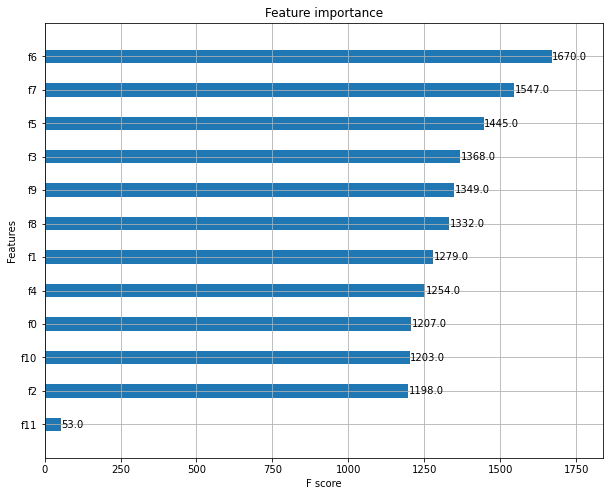

In [44]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_wrapper, ax=ax , max_num_features=20,height=0.4)

## 스태킹 실습

### CV 세트 기반의 스태킹을 진행하려 한다. 개별 기반 모델들이 교차 검증을 통해 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하기 위한 함수를 작성하시오.
```
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    return train_fold_pred , test_pred_mean
```

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

### 스태킹에 사용될 머신러닝 알고리즘 클래스를 생성하시오.
- 개별 모델: KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, 에이다부스트(n_estimators=100), LightGBM(n_estimators=400)
- 최종 모델: 로지스틱 회귀(C=10)

In [49]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)




### 개별 모델별로 get_stacking_base_datasets 함수를 수행하여 최종 메타 모델이 사용할 학습용, 테스트용 데이터를 생성하시오.
- 폴드 개수는 7개

In [52]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

IndexingError: Too many indexers

### 생성된 학습용 데이터와 테스트용 데이터를 각각 합치시오.
- 학습용 데이터는 Stack_final_X_train
- 테스트용 데이터는 Stack_final_X_test

In [51]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

NameError: name 'knn_train' is not defined

### 최종 메타 모델인 로지스틱 회귀를 사용하여 학습 및 예측을 진행하고 최종 메타 모델의 예측 정확도를 출력하시오.

In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

# 버섯 독성 여부 분류 - CatBoost 실습

mushrooms.csv 파일을 사용합니다.

독성 버섯인지 식용 가능한 버섯인지 분류해내는 것이 목표입니다.

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

데이터셋 출처: https://www.kaggle.com/datasets/uciml/mushroom-classification

In [48]:
#필요한 라이브러리 import
import pandas as pd
import numpy as np

In [53]:
#데이터셋 불러오기

mushroom=pd.read_csv("./mushrooms.csv",encoding='latin-1')
mushroom.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 데이터 전처리

### info()를 통해 결측치가 있는지 확인하시오.

In [51]:
mushroom.info()  # 결측치 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 데이터에서 피쳐값과 타겟값을 분리하여 각각 X_mushroom, y_mushroom으로 저장하시오
- target은 class

In [54]:
X_mushroom= mushroom.drop('class', axis = 1)
y_mushroom= mushroom['class']

In [54]:
#데이터 확인(X_mushroom)
X_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [55]:
#데이터 확인(y_mushroom)
y_mushroom

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

### train_test_split()을 이용해 train set과 test set을 분리하시오.

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X_mushroom,y_mushroom, test_size=0.2, random_state=0)

In [56]:
#잘 분리되었는지 확인
print('학습셋의 shape: ', X_train.shape)
print('검증셋의 shape: ', X_test.shape)
print('학습셋 label의 shape: ', y_train.shape)
print('검증셋 label의 shape: ', y_test.shape)

학습셋의 shape:  (6499, 22)
검증셋의 shape:  (1625, 22)
학습셋 label의 shape:  (6499,)
검증셋 label의 shape:  (1625,)


### CatBoost를 진행할 수 있도록 범주형 변수를 처리하시오.
- trainset은 train_pool에 저장
- testset은 test_pool에 저장

In [61]:
!pip install catboost
from catboost import CatBoostClassifier, Pool, cv

cat_cols = X_mushroom.columns[X_mushroom.dtypes == 'object'].to_list()
train_pool=Pool(data=X_train, label=y_train, cat_features=cat_cols)
test_pool= Pool(data=X_test, label=y_test, cat_features=cat_cols)

### CatBoost 모델을 기반으로 버섯에 대한 정보를 학습하고 버섯의 독성 여부를 예측하시오.
- iteration=400, learning_rate=0.1, max_depth=3
- catb_predes, catb_pred_proba

In [63]:
catb=CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
catb.fit(train_pool)
catb_preds=catb.predict(test_pool)
catb_pred_proba=catb.predict_proba(test_pool)[:,1]

0:	learn: 0.4819449	total: 193ms	remaining: 1m 17s
1:	learn: 0.3458234	total: 219ms	remaining: 43.5s
2:	learn: 0.2406946	total: 252ms	remaining: 33.3s
3:	learn: 0.1844678	total: 288ms	remaining: 28.5s
4:	learn: 0.1373126	total: 321ms	remaining: 25.4s
5:	learn: 0.0885901	total: 356ms	remaining: 23.4s
6:	learn: 0.0605750	total: 386ms	remaining: 21.7s
7:	learn: 0.0512256	total: 416ms	remaining: 20.4s
8:	learn: 0.0439515	total: 450ms	remaining: 19.5s
9:	learn: 0.0386189	total: 483ms	remaining: 18.8s
10:	learn: 0.0357809	total: 515ms	remaining: 18.2s
11:	learn: 0.0310151	total: 546ms	remaining: 17.7s
12:	learn: 0.0294607	total: 579ms	remaining: 17.2s
13:	learn: 0.0257821	total: 610ms	remaining: 16.8s
14:	learn: 0.0242096	total: 640ms	remaining: 16.4s
15:	learn: 0.0228851	total: 676ms	remaining: 16.2s
16:	learn: 0.0214552	total: 717ms	remaining: 16.2s
17:	learn: 0.0202591	total: 756ms	remaining: 16s
18:	learn: 0.0192356	total: 788ms	remaining: 15.8s
19:	learn: 0.0172313	total: 824ms	remainin

166:	learn: 0.0019979	total: 5.79s	remaining: 8.08s
167:	learn: 0.0019884	total: 5.83s	remaining: 8.04s
168:	learn: 0.0019445	total: 5.86s	remaining: 8.01s
169:	learn: 0.0019444	total: 5.9s	remaining: 7.98s
170:	learn: 0.0019090	total: 5.93s	remaining: 7.94s
171:	learn: 0.0019090	total: 5.96s	remaining: 7.9s
172:	learn: 0.0019090	total: 5.99s	remaining: 7.86s
173:	learn: 0.0019090	total: 6.02s	remaining: 7.82s
174:	learn: 0.0019090	total: 6.05s	remaining: 7.78s
175:	learn: 0.0019090	total: 6.08s	remaining: 7.74s
176:	learn: 0.0019090	total: 6.11s	remaining: 7.69s
177:	learn: 0.0019090	total: 6.13s	remaining: 7.65s
178:	learn: 0.0019090	total: 6.16s	remaining: 7.61s
179:	learn: 0.0019090	total: 6.19s	remaining: 7.57s
180:	learn: 0.0019090	total: 6.22s	remaining: 7.52s
181:	learn: 0.0019090	total: 6.24s	remaining: 7.48s
182:	learn: 0.0019090	total: 6.27s	remaining: 7.44s
183:	learn: 0.0019089	total: 6.3s	remaining: 7.4s
184:	learn: 0.0019089	total: 6.33s	remaining: 7.36s
185:	learn: 0.00

331:	learn: 0.0019078	total: 10.9s	remaining: 2.23s
332:	learn: 0.0019078	total: 10.9s	remaining: 2.2s
333:	learn: 0.0019078	total: 11s	remaining: 2.16s
334:	learn: 0.0019078	total: 11s	remaining: 2.13s
335:	learn: 0.0019078	total: 11s	remaining: 2.1s
336:	learn: 0.0019078	total: 11s	remaining: 2.06s
337:	learn: 0.0019078	total: 11.1s	remaining: 2.03s
338:	learn: 0.0019078	total: 11.1s	remaining: 2s
339:	learn: 0.0019078	total: 11.1s	remaining: 1.96s
340:	learn: 0.0019078	total: 11.1s	remaining: 1.93s
341:	learn: 0.0019078	total: 11.2s	remaining: 1.9s
342:	learn: 0.0019078	total: 11.2s	remaining: 1.86s
343:	learn: 0.0019078	total: 11.2s	remaining: 1.83s
344:	learn: 0.0019078	total: 11.3s	remaining: 1.8s
345:	learn: 0.0019078	total: 11.3s	remaining: 1.76s
346:	learn: 0.0019078	total: 11.3s	remaining: 1.73s
347:	learn: 0.0019078	total: 11.4s	remaining: 1.7s
348:	learn: 0.0019078	total: 11.4s	remaining: 1.67s
349:	learn: 0.0019078	total: 11.4s	remaining: 1.63s
350:	learn: 0.0019078	total:

### 예측 성능을 평가하시오.

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test,catb_preds,catb_pred_proba)